## Лабораторная работа №3. Линейная регрессия

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

### Измерения потребления электроэнергии в одном домохозяйстве с частотой выборки в одну минуту за период почти 4 года (Individual household electric power consumption) ###
Global_active_power Глобальная_активная_мощность(Квт)\
Global_reactive_power Неэффективная_потребляемая_мощность\
Voltage Напряжение(Вольт)\
Global_intensity Глобальная интенсивность тока домохозяйства, усредненная за минуту (в амперах)\
Sub_metering_1 Соответствует кухне, содержащей в основном посудомоечную машину, духовку и микроволновую печь \
Sub_metering_2 Соответствует прачечной, содержащей стиральную машину, сушилку для белья, холодильник и свет. \
Sub_metering_3 Соответствует электрическому водонагревателю и кондиционеру.

#### Прочитаем txt 

In [3]:
df= pd.read_csv('household_power_consumption.txt',sep = ';',dayfirst=True,
                parse_dates=[['Date','Time']],  
                low_memory=False, na_values=['nan','?'])

#### Добавим колонки часа и дня недели

In [4]:
df['Hours'] = df['Date_Time'].dt.hour
df['Weekday'] = df['Date_Time'].dt.weekday
df = df.drop(['Date_Time'],axis=1)
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Hours,Weekday
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,17,5
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,17,5
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,17,5
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,17,5
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,17,5


#### Исключим строки с NaN

In [8]:
ma=~(np.isnan(df).any(axis=1))
df = df[ma]

#### Разделим выборку на тестовую и тренировочную

In [9]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]
print("test data lenth = ",len(test)," => ", round(len(test)/len(df)*100),"%")
print("train data lenth = ",len(train)," => ", round(len(train)/len(df)*100),"%")

test data lenth =  410006  =>  20 %
train data lenth =  1639274  =>  80 %


#### Используя линейную регрессию обучим модель

In [10]:
y = train['Global_active_power']
x = train.drop(['Global_active_power'],axis=1)
model = LinearRegression().fit(x, y)

#### Сделаем предсказания на тестовой выборке

In [12]:
test_y = test.reset_index(drop=True, inplace=True)
test_y = test['Global_active_power']
test_x = test.drop(['Global_active_power'],axis=1)
result_y = model.predict(test_x)

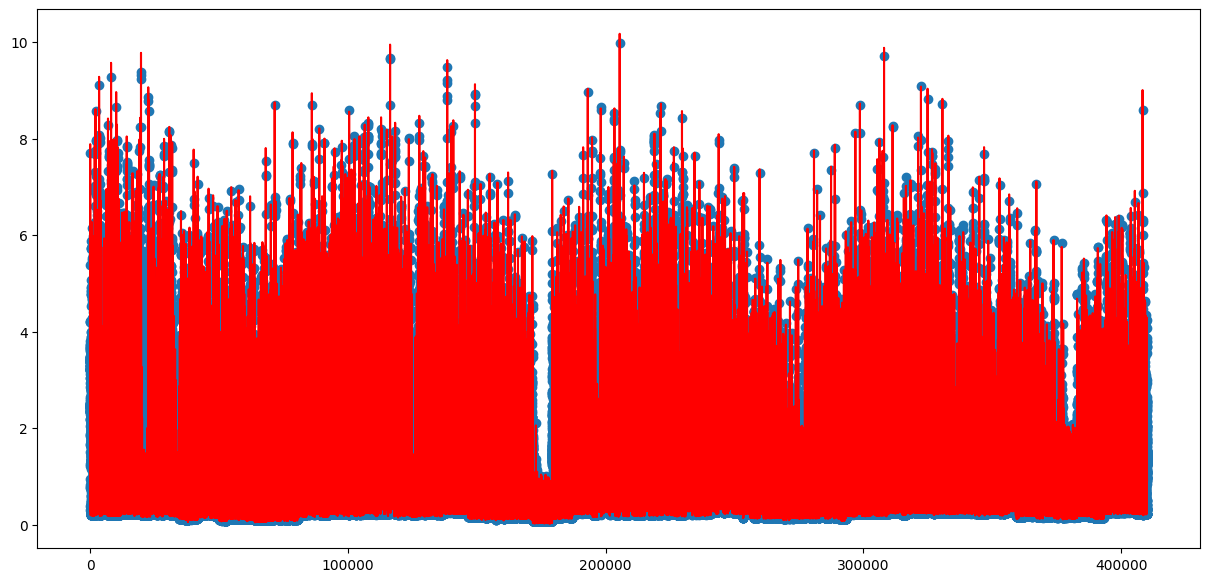

In [13]:
plt.rcParams['figure.figsize'] = [15,7]
plt.scatter(test_y.index,test_y)
plt.plot(result_y, color='red')
plt.show()

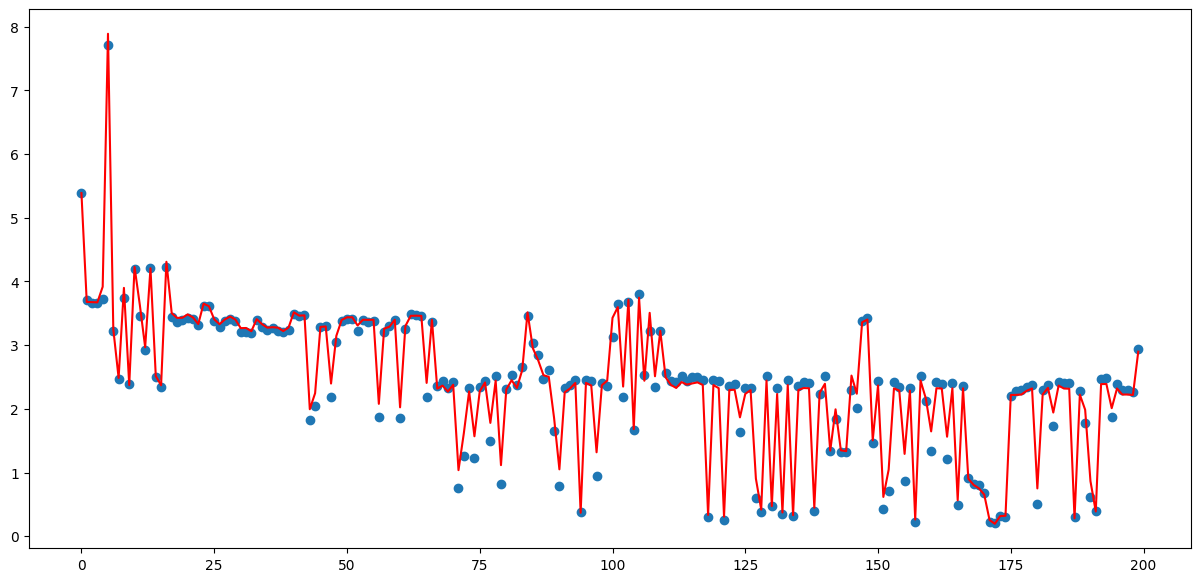

In [14]:
to = 200
stest_y = test_y.iloc[0:to]
sresult_y = result_y[0:to]
plt.scatter(stest_y.index,stest_y)
plt.plot(stest_y.index,sresult_y, color='red')
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error,r2_score
print("Среднее арифметическое (Mean) квадратов разностей между предсказанными и реальными значениями: %.2f" % mean_squared_error(stest_y.values, sresult_y))
print("r2_score: ",r2_score(stest_y.values, sresult_y))

Среднее арифметическое (Mean) квадратов разностей между предсказанными и реальными значениями: 0.01
r2_score:  0.9877255971973679


## Полиномиальная функция ##

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
def Fpolynomial(x, y, size):
    for style, degree in (("g-+", 1),("r-+", 2),("b--", 3)):
        polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
        lin_reg = LinearRegression()
        polynomial_regression = Pipeline([
                ("poly_features", polybig_features),
                ("lin_reg", lin_reg),
            ])
        polynomial_regression.fit(x[0:size], y[0:size])
        y_newbig = polynomial_regression.predict(x[0:size])
        Dff = pd.DataFrame(y_newbig[0:size])
        plt.plot(Dff.index, Dff, style, label=str(degree))    
        print(f'Degree: {degree}')
        print(f'Mean Squared Error: {mean_squared_error(y[0:size], y_newbig[0:size])}')
        print(f'R^2 Score: {r2_score(y[0:size], y_newbig[0:size])}')      
    plt.legend()
    plt.show()

Degree: 1
Mean Squared Error: 0.011918949910168482
R^2 Score: 0.9922352762206008
Degree: 2
Mean Squared Error: 0.009502271140588919
R^2 Score: 0.9938096467189041
Degree: 3
Mean Squared Error: 0.002852011071146434
R^2 Score: 0.9981420277499155


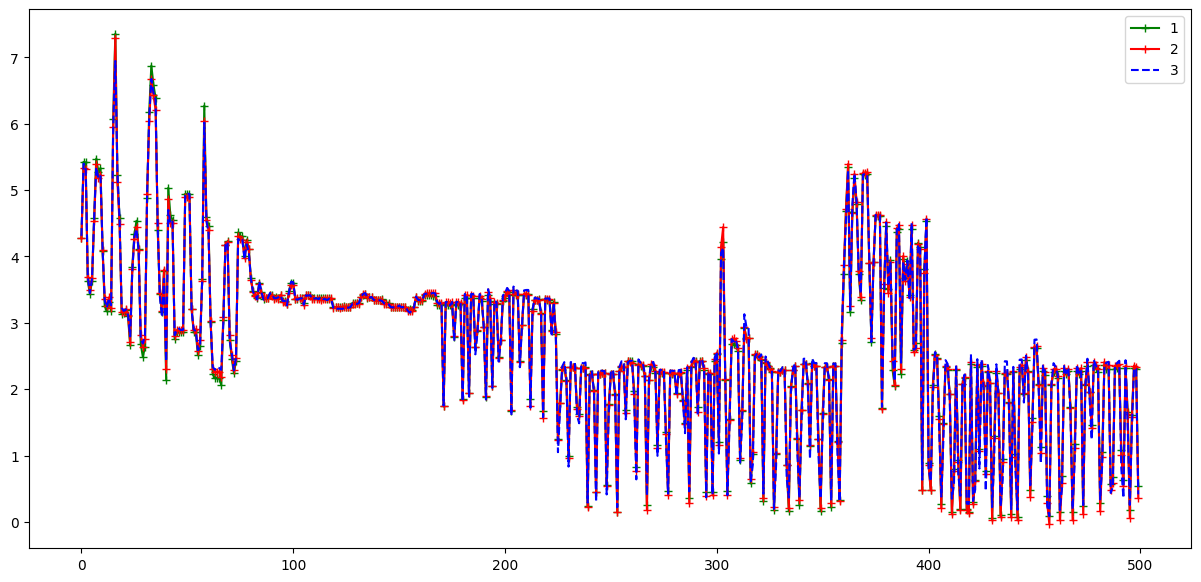

In [18]:
Fpolynomial(x,y,500)

## Стохастический градиентный спуск ##

In [35]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import root_mean_squared_error
ridge_gd = SGDRegressor(loss = 'epsilon_insensitive', 
                        penalty = 'l1',
                        max_iter = 70,
                        learning_rate = 'adaptive',
                        random_state = 40)
ridge_gd.fit(x, y)
y_pred_test = ridge_gd.predict(test_x)
print(f'Mean Squared Error: {mean_squared_error(test_y, y_pred_test)}')
print(f'R^2 Score: {r2_score(test_y, y_pred_test)}') 
SGDy_pred_test = pd.DataFrame(y_pred_test) 

Mean Squared Error: 0.002725702368947371
R^2 Score: 0.9975696541460881


#### Используем Lasso для регуляризации

In [21]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.1, tol = 0.0001)
lasso.fit(x, y)
y_pred_test = lasso.predict(test_x)
print(f'Mean Squared Error: {mean_squared_error(test_y, y_pred_test)}')
print(f'R^2 Score: {r2_score(test_y, y_pred_test)}')
Lassoy_pred_test = pd.DataFrame(y_pred_test)

Mean Squared Error: 0.0026971895614709457
R^2 Score: 0.9975950773119565


#### Lasso сочла признаки Global_intensity и Sub_metering_3 наиболее значимыми для данной модели:

In [28]:
print(lasso.coef_)

[-0.          0.          0.22891867  0.          0.          0.00306123
  0.          0.        ]


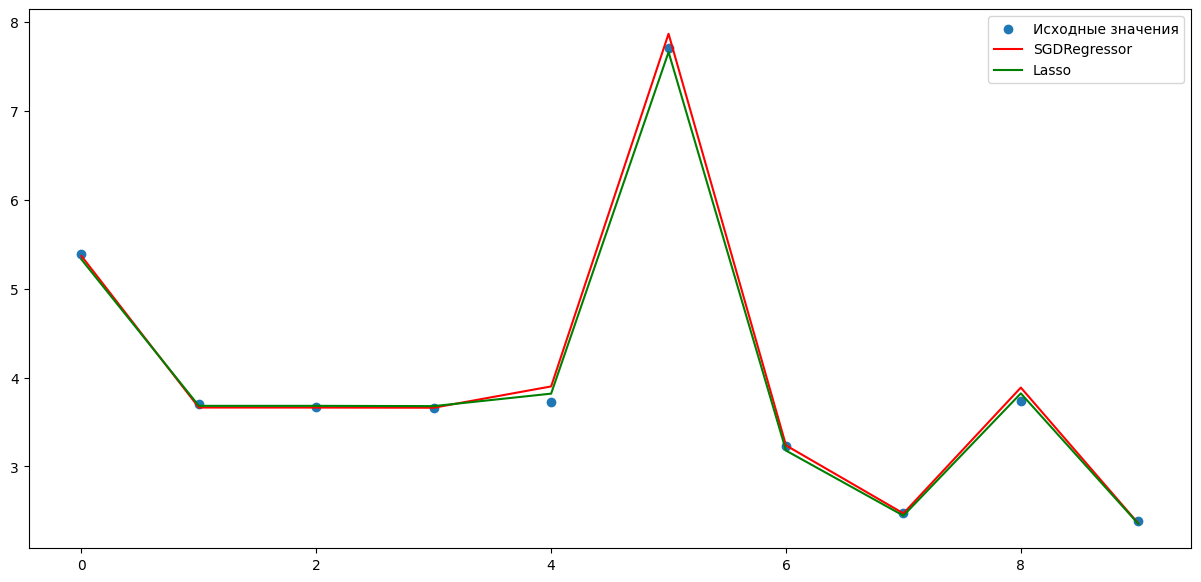

In [29]:
size = 10
plt.scatter(test_y.index[0:size],test_y[0:size],label="Исходные значения")
plt.plot(SGDy_pred_test.index[0:size],SGDy_pred_test[0:size],"r-",label="SGDRegressor")
plt.plot(Lassoy_pred_test.index[0:size],Lassoy_pred_test[0:size],"g-",label="Lasso")
plt.legend()
plt.show()